**Time Series Analysis with Google stock's close price**

---------------------------------------------------------------------------------------------------------------------------

This notebook performs time series analysis with Google stock's close price. The notebook includes the following parts:

1. Data Exploratory Analysis

    - 1.1 Descriptive Analysis
    - 1.2 Check Stationarity
        - 1.2.1  Decomposition method
        - 1.2.2  Plotting Rolling Statistics
        - 1.2.3  Statistical test
    - 1.3 Stationalize time series
        - 1.3.1  Eliminate trend by smoothing technique
        - 1.3.2  Eliminating Trend and Seasonality by differencing
        - 1.3.3  Eliminating Trend and Seasonality by decomposing
    - 1.4  Autocorrelation Function(ACF) and Partial Autocorrelation Function(PACF)
    
    
2. Prediction models

    - 2.1 Statistical models
        - 2.1.1 ARIMA model
        - 2.1.2  autoSARIMA model
        - 2.1.3  Generalized Autoregressive conditional heteroscedasticity GARCH model
    - 2.2  Neural Network Models
        - 2.2.1  Single step models
            - 2.2.1.1  Feedforward linear model
            - 2.2.1.2  Convolutional Neural Network
            - 2.2.1.3  Recurrent neural network
        - 2.2.2  Multi-step models
            - 2.2.2.1  Single-shot model
            - 2.2.2.2  Autoregressive model with RNN
        - 2.2.3  Model performance comparison

In [2]:
import yfinance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from PIL import Image 

Data is daily Google close stock price from 01-01-2017 to 05-10-2020 downloaded from Yahoo Finance.

Download data from yahoo finance

In [3]:
data =  yfinance.download('GOOGL','2017-01-01','2020-10-05')

[*********************100%***********************]  1 of 1 completed


# **Data Exploratory Analysis**



## Descriptive Analysis

**Original data from Yahoo finance**

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,800.619995,811.440002,796.890015,808.010010,808.010010,1959000
2017-01-04,809.890015,813.429993,804.109985,807.770020,807.770020,1515300
2017-01-05,807.500000,813.739990,805.919983,813.020020,813.020020,1340500
2017-01-06,814.989990,828.960022,811.500000,825.210022,825.210022,2017100
2017-01-09,826.369995,830.429993,821.619995,827.179993,827.179993,1408900


It is observed that the dataset does not contain data for every day in the chosen timeframe. For example, there is no data from day 7 and 8 in 2017. This is not missing data but maybe the way how data is available on Yahoo finance. I also doubled check with the data on quandl and it shows the same patterns.

**Close price data**

Let's create a dataframe with only close price data and examize the data

In [5]:
close = data[['Close']]
close.head()

,Close
Date,
2017-01-03,808.010010
2017-01-04,807.770020
2017-01-05,813.020020
2017-01-06,825.210022
2017-01-09,827.179993


In [6]:
close.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-28', '2020-09-29', '2020-09-30',
               '2020-10-01', '2020-10-02'],
              dtype='datetime64[ns]', name='Date', length=945, freq=None)

In [7]:
close.shape

(945, 1)

In [8]:
close.describe()

,Close
count,945.000000
mean,1150.425091
std,185.078862
min,807.770020
25%,1033.040039
50%,1130.010010
75%,1244.410034
max,1717.390015


In [9]:
# Check missing value
close[close.isnull().any(axis=1)]

,Close
Date,


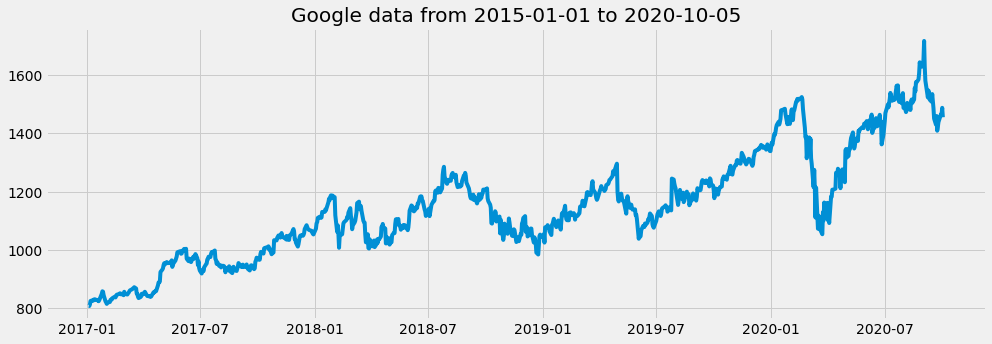

In [14]:
plt.figure(figsize=(15,5))
plt.plot(close)
plt.title('Google data from 2015-01-01 to 2020-10-05')
plt.show()

**Observations**

- There is clear upward trend in the time series. 
- There are also some cylical patterns. These patterns neither repeat for the same time periods (weekly, monthly, yearly) nor have exact same effect for each period. Thus, this is more like some cyclical patterns affected by specific events at a given time rather than seasonality. Let's examine more on this matter on yearly plot in the next section.
- The variance does not stay the same for the whole period, it gets larger in the latter period. This can be an indication of heteroskedasticity.

##  Check Stationarity

A time series is called to be (weakly) stationary if it has:
- constant mean
- constant variance
- covariance is a function of lag values instead of function of time 

Thus a stationary time series should not exhibit trend or seasonality patterns. In this section, I will examine the stationary of Google close stock using 3 methods:

- Decomposition
- Plotting rolling statistics
- Statistical tests

### Decomposition method

A time series has 4 components:

- Level: the average values in the time series
- Trend: upward or downward trend
- Seasonality: the repeating short-term cycles in the time series
- Residuals: The random variation in the series

By decomposing the time series, we can detect if it has trend and seasonality

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Decompose the whole time series**

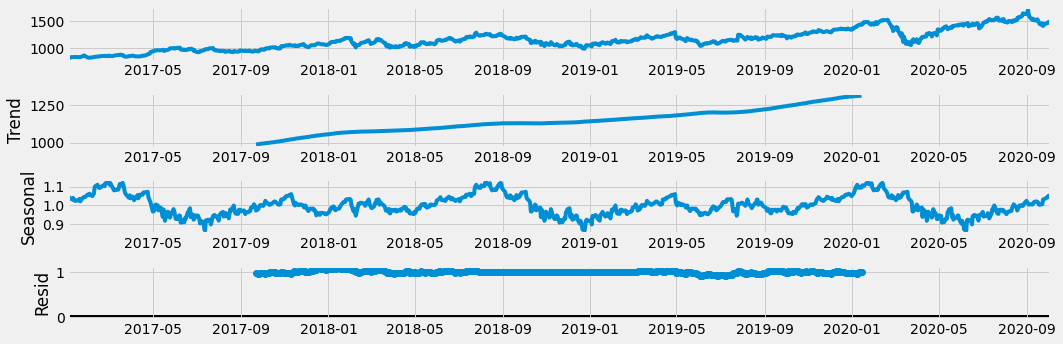

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
result = seasonal_decompose(close, model='multiplicative',period=365)
result.plot()
plt.show()

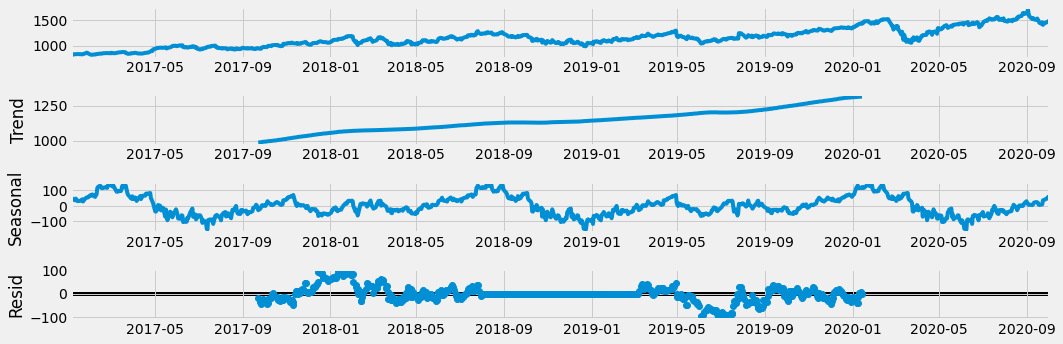

In [17]:
result = seasonal_decompose(close, model='additive',period=365)
result.plot()
plt.show()

There is a clear upward trend for the whole time series. There are also cyclical patterns.

The residuals varies around 0 in additive model while around 1 in multiplicative model. The residuals in additive model shows similar patterns at the beginning and at the end of the time period. 

**Decompose time series by year**

**2017**

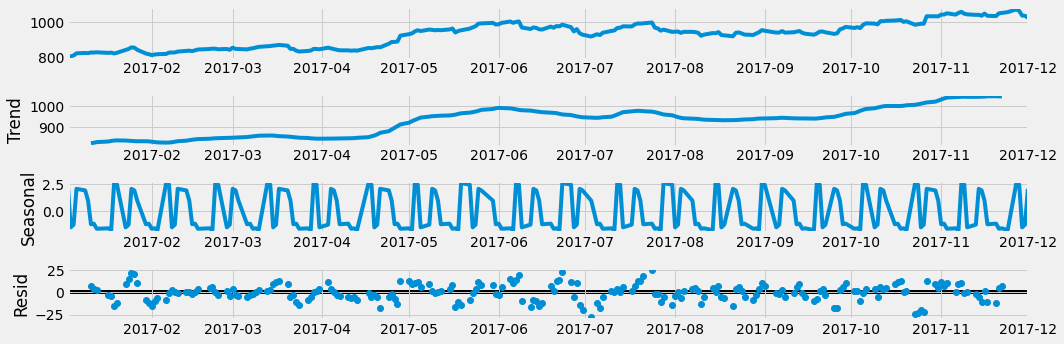

In [18]:
rcParams['figure.figsize'] = 15, 5
result = seasonal_decompose(close.loc['2017-01-01':'2017-12-01'], model='additive',period=12)
result.plot()
plt.show()

**2018**

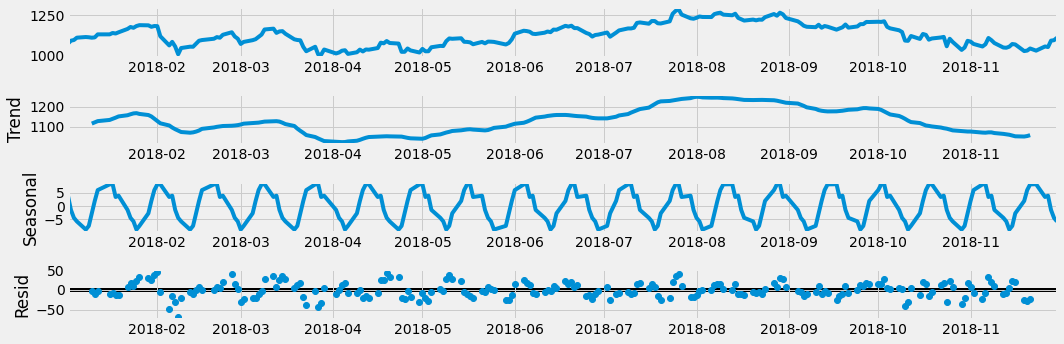

In [19]:
rcParams['figure.figsize'] = 15, 5
result = seasonal_decompose(close.loc['2018-01-01':'2018-12-01'], model='additive',period=12)
result.plot()
plt.show()

**2019**

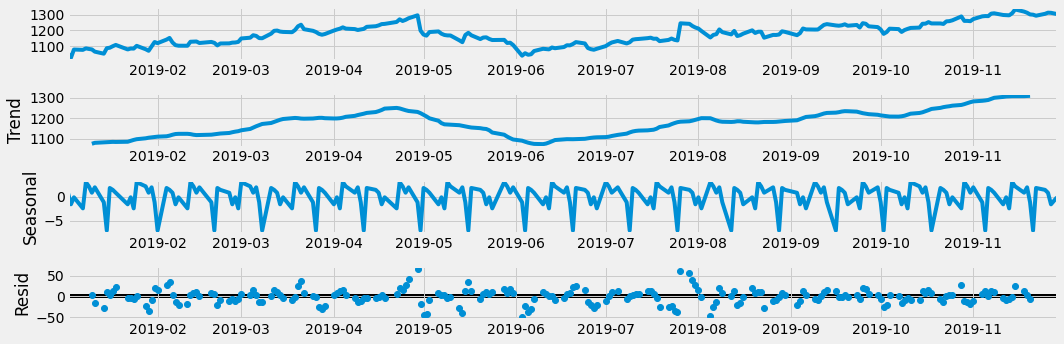

In [20]:
rcParams['figure.figsize'] = 15, 5
result = seasonal_decompose(close.loc['2019-01-01':'2019-12-01'], model='additive',period=12)
result.plot()
plt.show()

**2020**

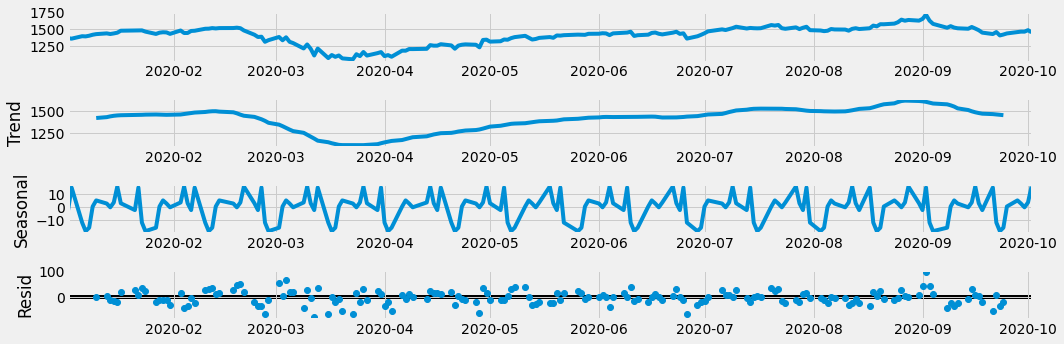

In [21]:
rcParams['figure.figsize'] = 15, 5
result = seasonal_decompose(close.loc['2020-01-01':'2020-12-01'], model='additive',period=12)
result.plot()
plt.show()

Regarding the yearly decomposition, it is observed that:
- There are both downward and upward trends in a year. 
- There are small repeating cycles in a month thus seasonality can be on weekly level. 
- Residuals look more random than the whole period decomposition. 

Thus the additive model seems to be a better fit for this stock than the multiplicative model.

**=> It is clearly that the time series is not stationary**

### Plotting Rolling Statistics

This visualization method is a simple way to check if time series has a constant mean and a constant standard deviation throughout the whole period.

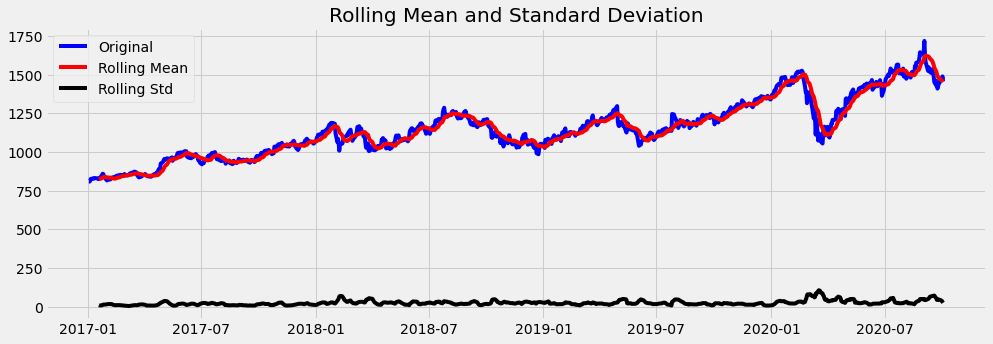

In [22]:
def plot_rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
plot_rolling_statistics(close)

We can see that the rolling standard deviations seem constant.However, the rolling means are increasing and varies quite much which indicates non stationary. 

### Statistical test

**Perform Dickey Fuller to test if the series has unit root**

Null hypothesis $H_0$: Series has unit root (not stationary)

Alternative hypothesis $H_1$: Series does not have unit root (stationary)

In [23]:
from statsmodels.tsa.stattools import adfuller
def dickey_fuller_test(timeseries):

    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
        
dickey_fuller_test(close)

Results of dickey fuller test
Test Statistics                 -1.651664
p-value                          0.456173
No. of lags used                 9.000000
Number of observations used    935.000000
critical value (1%)             -3.437363
critical value (5%)             -2.864636
critical value (10%)            -2.568419
dtype: float64


p-value > 0.05 => Accept null hypothesis that the time series is not stationary

**Perform Kwiatkowski-Phillips-Schmidt-Shin – KPSS test to test if the series is stationary**

Null hypothesis $H_0$: Series is stationary

Alternative hypothesis $H_1$: Series is not stationary

In [24]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    #perform kpss test  
    print("Results of kpss test")
    kpss_result = kpss(timeseries, regression='c')
    output = pd.Series(kpss_result[0:3],index=['Test Statistics','p-value','No. of lags used'])
    for key,values in kpss_result[3].items():
        output['critical value (%s)'%key] =  values
    print(output)

Results of kpss test

Test Statistics           3.427185

p-value                   0.010000

No. of lags used         40.000000

critical value (10%)      0.347000

critical value (5%)       0.463000

critical value (2.5%)     0.574000

critical value (1%)       0.739000

dtype: float64

p-value < 0.05 => Reject null hypothesis that the time series is stationary

## Stationalize time series

In [25]:
log = np.log(close)

### Eliminate trend by smoothing technique 

**Moving Average**

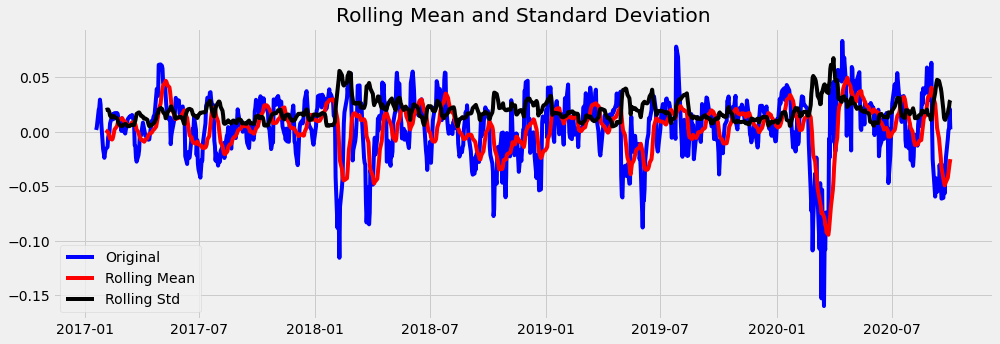

Results of dickey fuller test
Test Statistics               -6.591892e+00
p-value                        7.080499e-09
No. of lags used               1.200000e+01
Number of observations used    9.210000e+02
critical value (1%)           -3.437470e+00
critical value (5%)           -2.864683e+00
critical value (10%)          -2.568444e+00
dtype: float64


In [26]:
log_moving_avg = log.rolling(12).mean()
diff_log_moving_avg = log - log_moving_avg
diff_log_moving_avg.dropna(inplace=True)
plot_rolling_statistics(diff_log_moving_avg)
dickey_fuller_test(diff_log_moving_avg)

**Exponentially Weighted Moving Average**

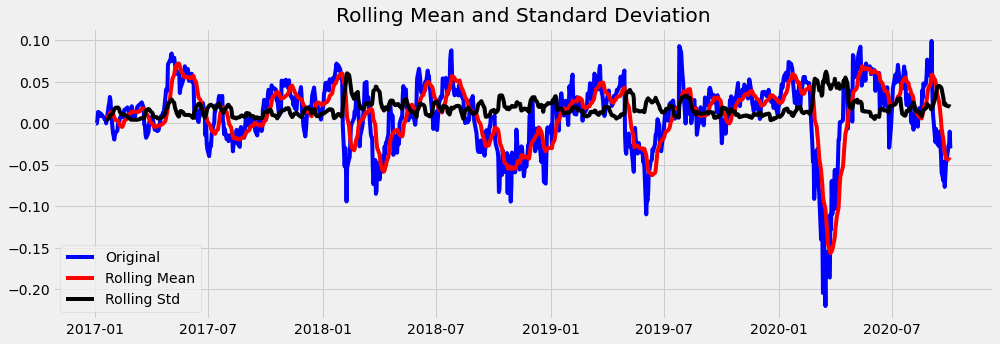

Results of dickey fuller test
Test Statistics                 -5.273991
p-value                          0.000006
No. of lags used                 9.000000
Number of observations used    935.000000
critical value (1%)             -3.437363
critical value (5%)             -2.864636
critical value (10%)            -2.568419
dtype: float64


In [27]:
log_exp_moving_avg = log.ewm(halflife=12, min_periods=0,adjust=True).mean()
diff_log_exp_moving_avg = log - log_exp_moving_avg
diff_log_exp_moving_avg.dropna(inplace=True)
plot_rolling_statistics(diff_log_exp_moving_avg)
dickey_fuller_test(diff_log_exp_moving_avg)

### Eliminating Trend and Seasonality by differencing

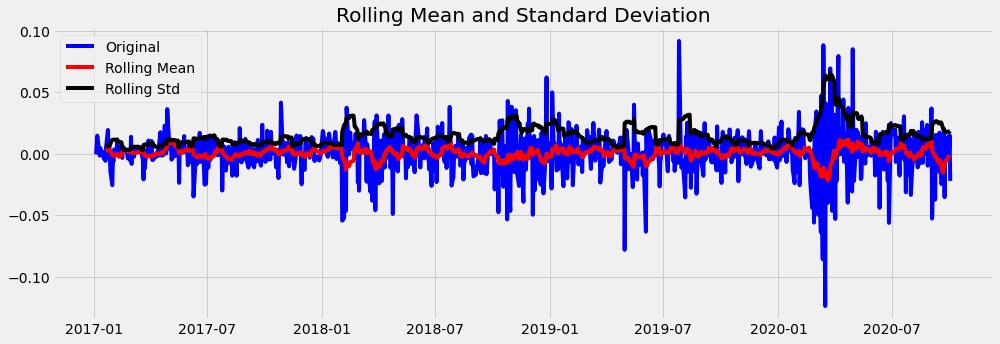

Results of dickey fuller test
Test Statistics               -1.010199e+01
p-value                        1.053573e-17
No. of lags used               8.000000e+00
Number of observations used    9.350000e+02
critical value (1%)           -3.437363e+00
critical value (5%)           -2.864636e+00
critical value (10%)          -2.568419e+00
dtype: float64


In [28]:
differenced = log - log.shift()
differenced.dropna(inplace=True)
plot_rolling_statistics(differenced)
dickey_fuller_test(differenced)

p-value < 0.05 => Reject null hypothesis that the time series is not stationary. The differenced time series is stationary.

### Eliminating Trend and Seasonality by decomposing

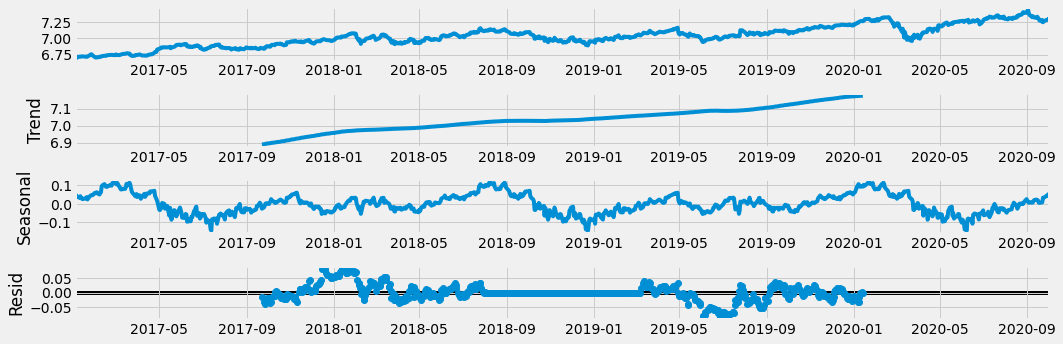

In [29]:
decomposed_log = seasonal_decompose(log, model='additive', period = 365)
decomposed_log.plot()
plt.show()

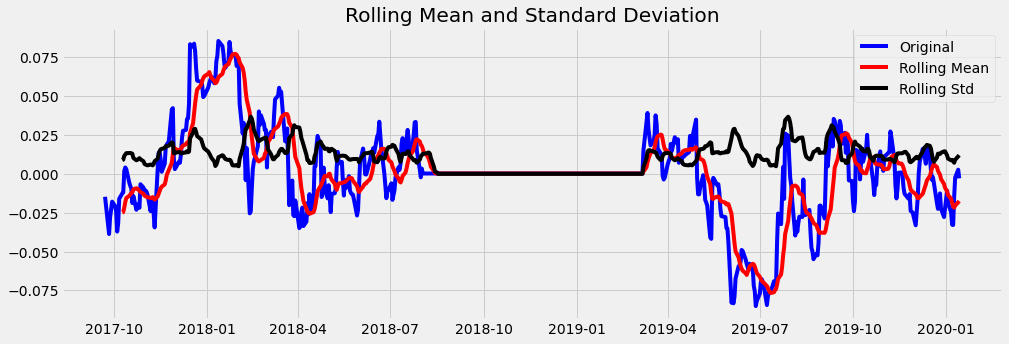

Results of dickey fuller test
Test Statistics                 -2.706468
p-value                          0.072926
No. of lags used                19.000000
Number of observations used    561.000000
critical value (1%)             -3.442060
critical value (5%)             -2.866706
critical value (10%)            -2.569521
dtype: float64


In [30]:
residual = decomposed_log.resid
residual.dropna(inplace=True)
plot_rolling_statistics(residual)
dickey_fuller_test(residual)

## Autocorrelation Function(ACF) and Partial Autocorrelation Function(PACF)

We can check the level of serial correlation in time series data by ACF and PACF plots.

ACF shows the serial correlation including the effect of in between values why PACF does not. 


In [14]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

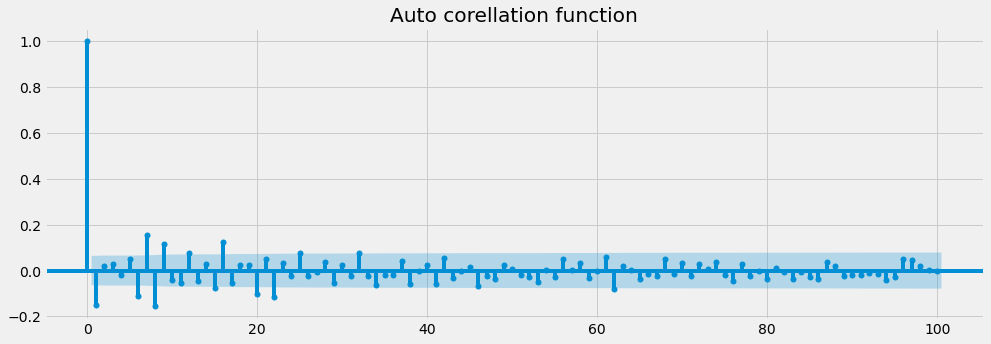

In [33]:
plot_acf(close.Close.diff().dropna(),lags=100) 
plt.title('Auto corellation function')

plt.show()

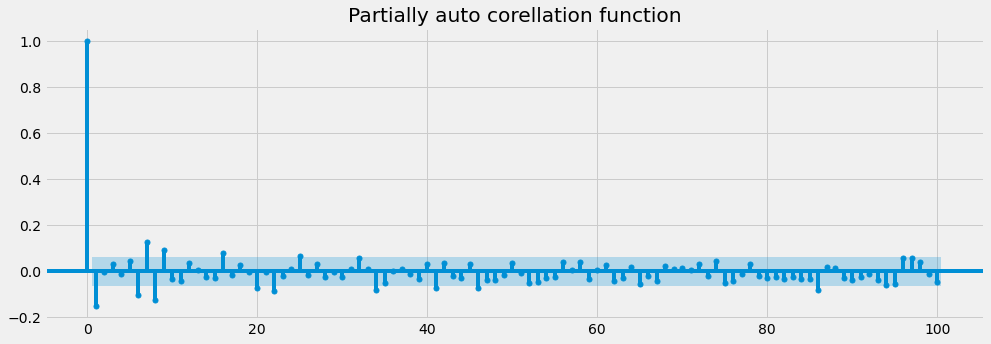

In [34]:
plot_pacf(close.Close.diff().dropna(),lags=100) 
plt.title('Partially auto corellation function')
plt.show()

# Prediction models

## Statistical models

### ARIMA model

ARIMA (AutoRegressive Integrated Moving Average) is an algorithm that model the time series on the basic that future values are a function of past values. ARIMA assumes there is no seasonal in the time series. ARIMA has 3 parameters (p,d,q) where:

- p is the order of Autoregression AR. AR indicates that the value of time step t is regressed on the values of previous time steps (t-1, t-2, etc.)

- q is the order of Moving Average MA. MA indicates that the value of time step t is regressed on the error term values of previous time steps.

- d is the number of differencing needed to make the time series stationary. The differencing is taken between the current value and its previous value.

**Check the order of AR, MA, and differencing**

***Checking the order of differencing***

From the **Stationarize time series** above part, we can see that we can get this time series stationary by differencing 1. Thus d = 1

***Checking the order of AR***

Checking the Partially auto corellation function (PACF) plot. From the above plot, we can see there is a significant correlation at lag 1. 

***Checking the order of MA***

Checking the Auto corellation function (ACF) plot. From the above plot, we can see there is a significant correlation at lag 1. 


In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
train = close[:700]
test = close[700:]

In [12]:
model = ARIMA(train.values, order=(1,1,1))
result = model.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  700
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2940.972
Date:                Sun, 15 Nov 2020   AIC                           5887.944
Time:                        17:58:12   BIC                           5901.593
Sample:                             0   HQIC                          5893.220
                                - 700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7690      0.153     -5.024      0.000      -1.069      -0.469
ma.L1          0.8219      0.136      6.029      0.000       0.555       1.089
sigma2       264.2328      7.028     37.595      0.0

**Check residuals**

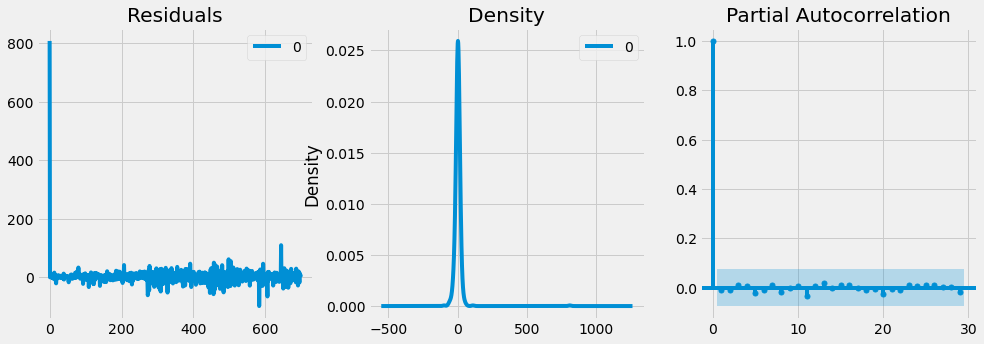

In [22]:
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,3, figsize=(15, 5))

residuals.plot(title="Residuals",ax=ax[0])
residuals.plot(kind='kde',title="Density",ax=ax[1])
plot_pacf(residuals,ax=ax[2])


plt.show()

In [24]:
residuals.describe()

,0
count,700.000000
mean,1.722085
std,34.573114
min,-98.600708
25%,-6.388107
50%,1.153353
75%,8.857900
max,808.010010


Residuals look normal. They seems to follow normal distribution. From its PACF, residuals seems random as there are no sign of autoregression.

**Plot prediction for train data and forecast for test data with 95% confidence interval.**

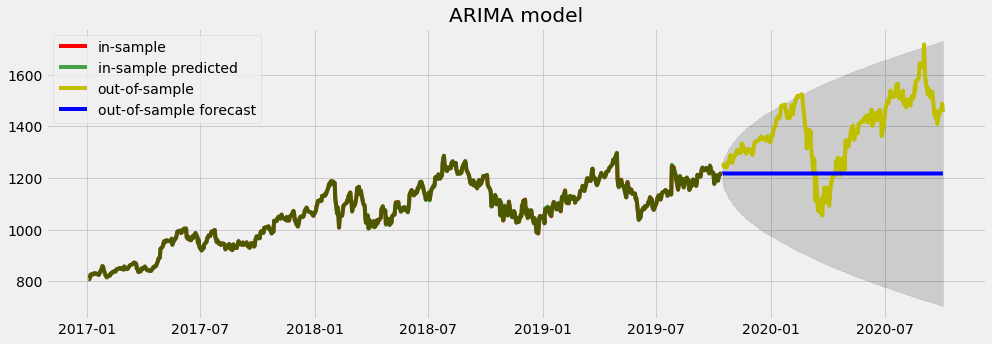

In [39]:
from math import sqrt
from sklearn.metrics import mean_squared_error

#calculate in-sample prediction (prediction for train data)
in_sample_predicted = pd.DataFrame(result.predict(1,train.shape[0]))
in_sample_predicted.set_index(train.index,inplace=True)

#calculate out-of-sample prediction (prediction for test data)
out_of_sample_forecast = pd.DataFrame(result.forecast(steps=test.shape[0],alpha=0.05))
out_of_sample_forecast.set_index(test.index,inplace=True)

#calculate 95% confidence interval for out-of-sample prediction
out_of_sample_confidence_interval = result.get_forecast(steps=test.shape[0],alpha=0.05).conf_int(alpha=0.05)
out_of_sample_confidence_interval_lower =  pd.Series(out_of_sample_confidence_interval[:, 0], index=test.index)
out_of_sample_confidence_interval_upper =  pd.Series(out_of_sample_confidence_interval[:, 1], index=test.index)

#plot
plt.plot(train,color='r',label='in-sample')
plt.plot(in_sample_predicted,color='g',alpha=.7,label='in-sample predicted')

plt.plot(test,color = 'y',label='out-of-sample')
plt.plot(out_of_sample_forecast,color='b', label='out-of-sample forecast')

plt.fill_between(out_of_sample_confidence_interval_lower.index, 
                 out_of_sample_confidence_interval_lower, out_of_sample_confidence_interval_upper, 
                 color='k', alpha=.15)

plt.title('ARIMA model')

plt.legend()

plt.show()

**Evaluate ARIMA(1,1,1) performance**

The model is able to predict very well the in-sample data but is not able to forecast very well the out-of-sample data. However, almost all of out-of-sample true values lies inside the out-of-sample forecast 95% confidence interval except some peak values. Model also does not able to capture seasonality and trend. 

### autoSARIMA model 

In this section, I will build SARIMA model which takes into account the seasonality. SARIMA model de-seasonality by using seasonal differencing. The seasonal differencing is different from trend differencing (the one we use to stationalize the time series in above sections) in the way that it subtracts the value from previous season instead of subtracting consecutive terms.

But instead of choosing the order of AR, MA, and Differencing manually, I will use the package pmdarima to automate the searching for optimal orders within specified range. Auto_arima() of package pmdarima will search for the best combination of orders which produces the least AIC score.

The SARIMA model is presented as SARIMA(p,d,q)(P,D,Q)m where:
- p is the order of trend autoregression AR
- q is the order of trend moving average MA
- d is the order of trend differencing

- P is the order of seasonal autoregression AR
- Q is the order of seasonal moving average MA
- D is the order of seasonal differencing

- m is the number of periods in each season



In [5]:
import pmdarima as pmd

In [40]:
smodel = pmd.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7285.636, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6060.890, Time=3.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6661.780, Time=4.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7296.793, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6232.048, Time=0.35 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5985.174, Time=12.43 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=22.63 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=8.72 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=7267.535, Time=12.10 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5985.214, Time=17.90 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=5984.965, Time=19.12 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=6061.748, Time=4.19 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=29.50 sec
 ARIMA(1,0,1)(1,1,1)[12] intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  700
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood               -2987.162
Date:                             Tue, 13 Oct 2020   AIC                           5984.324
Time:                                     15:44:58   BIC                           6006.993
Sample:                                          0   HQIC                          5993.094
                                             - 700                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9367      0.013     73.434      0.000       0.912       0.962
ma.L1          0.0630      0.037      1.705      0.088      -0.009       0.136
ar.S.L12      -0.6313      0.032    -20.024      0.000      -0.693      -0.570
ar.S.L24      -0.3332      0.028    -11.976      0.000      -0.388      -0.279
sigma2       342.0730     10.395     32.909      0.000     321.700     362.446
===================================================================================
Ljung-Box (Q):                      139.65   Jarque-Bera (JB):               605.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.58   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

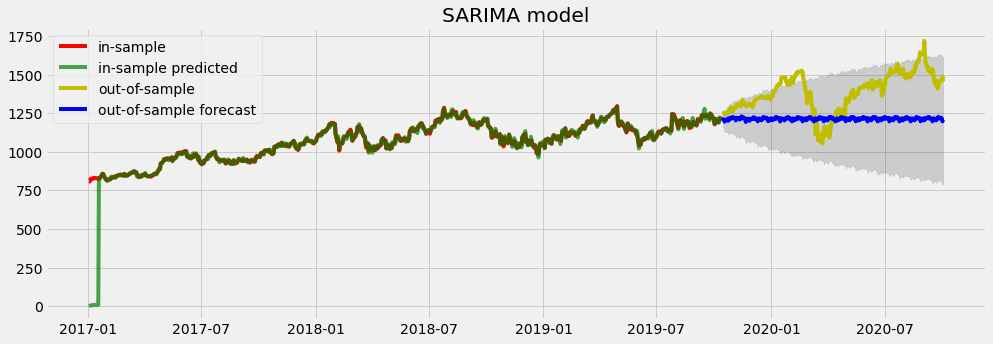

In [48]:


#calculate in-sample prediction (prediction for train data)
in_sample_predicted = pd.DataFrame(smodel.predict_in_sample(train,1,train.shape[0]))
in_sample_predicted.set_index(train.index,inplace=True)


# Forecast
out_of_sample_forecast, confidence_interval = smodel.predict(n_periods=test.shape[0], return_conf_int=True)

out_of_sample_forecast = pd.Series(out_of_sample_forecast, index=test.index)
confidence_interval_lower = pd.Series(confidence_interval[:, 0], index=test.index)
confidence_interval_upper = pd.Series(confidence_interval[:, 1], index=test.index)

#plot
plt.plot(train,color='r',label='in-sample')
plt.plot(in_sample_predicted,color='g',alpha=.7,label='in-sample predicted')

plt.plot(test,color = 'y',label='out-of-sample')
plt.plot(out_of_sample_forecast,color='b', label='out-of-sample forecast')

plt.fill_between(confidence_interval_lower.index, 
                 confidence_interval_lower, confidence_interval_upper, 
                 color='k', alpha=.15)

plt.title('SARIMA model')

plt.legend()

plt.show()

**Evaluate mode SARIMA(1,0,1)(2,1,0) performance**

This model is similar to ARIMA(1,1,1) in the performance in in-sample data. The out-of-sample forecast seems to capture some seasonality but its 95% confidence interval does not capture very well the out-of-sample true values compared to ARIMA(1,1,1). 

### Generalized Autoregressive conditional heteroscedasticity GARCH model

It is observed from the above section that the time series shows heteroskedasticity as it does not have constant variance throughout the whole period. In other words, the variance for this time series is a function of time. If the variance at time step xt is conditional on the variance of previous past time steps, it is called volatility clustering (repeating patterns of high and low volatility periods) or conditional heteroskedasticity. 

ARCH and GARCH are statistical models used to model the variance of the error term at current time step as a function of the error terms of previous time steps.

ARCH models the variance of the current error term at current time step as a function of p lagged squared standard error terms. The standard error is the difference between the observed and predicted value from another model.

$\sigma_t^2 = \alpha_0 + \alpha_1 u_{t-1}^2 +  \alpha_1 u_{t-2}^2 + ... + \alpha_p u_{t-p}^2 $

GARCH models the variance of the current error term at current time step as a function of its p own lags and p lagged squared standard error terms. 

$\sigma_t^2 = \alpha_0 + \alpha_1 u_{t-1}^2 +  \alpha_1 u_{t-2}^2 + ... + \alpha_p u_{t-p}^2 + \beta_1\sigma_{t-1}^2 + ... + \beta_q\sigma_{t-q}^2 $

- p: number of lagged residual errors

- q: number of lagged variances

We can pass either the squared residuals from ARMA model or the daily return (percent changes between 2 consecutive time step values) series into ARCH and GARCH model. Here in this notebook, I will use the second case.

In [25]:
from arch import arch_model
from scipy.stats import probplot

**Let's examine the percent changes series first**

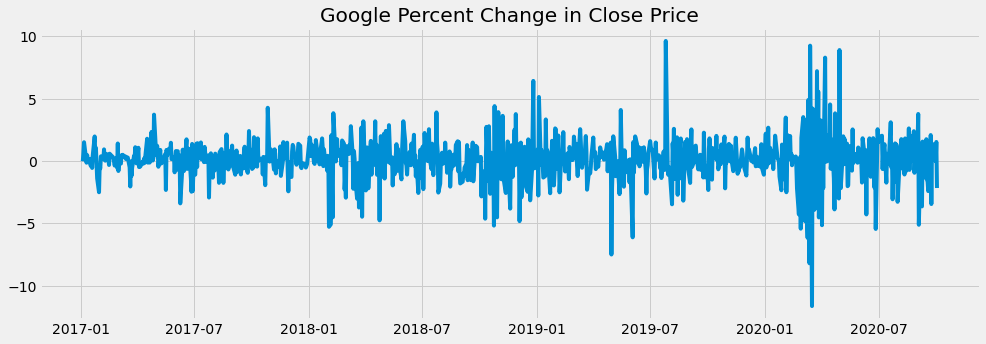

In [223]:
close_pct_change = 100*close['Close'].pct_change().values
close.insert(1, "close_pct_change", close_pct_change, True)
close.dropna(inplace=True)

plt.plot(close['close_pct_change'])
plt.title('Google Percent Change in Close Price')
plt.show()

The percentage change series shows continuous variation without a definite trend or pattern. It has some spikes toward the end of the time period. 

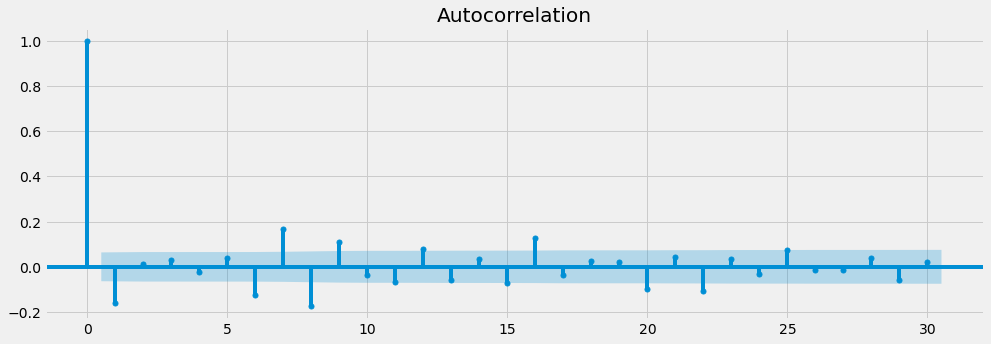

In [224]:
plot_acf(close['close_pct_change'],lags=30)
plt.show()

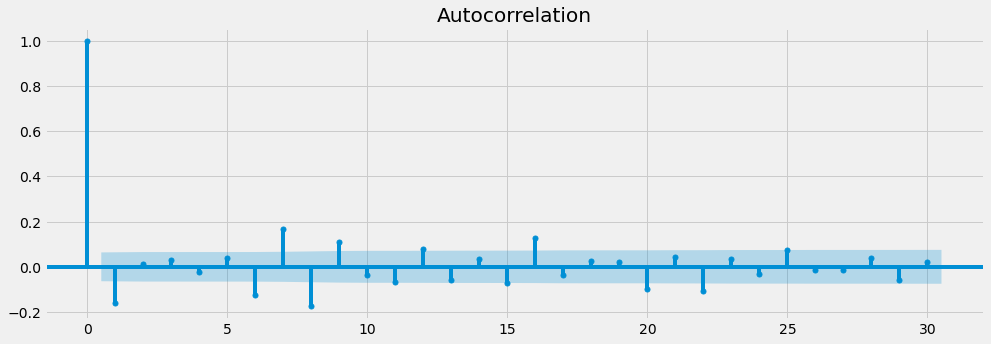

In [225]:
plot_acf(close['close_pct_change'],lags=30)
plt.show()

There are statistical significance at several lags (lag 1, lag 6,7,8, 9) in both ACF and PACF plot. This indicates autocorrelation. Let's use the statistical test to test it.

**Ljung-Box test for autocorrelation**

$H_0$: No autocorrelation. Data is indepedently distributed.

$H_1$: There is autocorrelation. Data is not independently distributed.

In [231]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [256]:
ljung_res = acorr_ljungbox(close['close_pct_change'], lags= 50, boxpierce=True)
print(f'Ljung-Box test p-values: {ljung_res[1]}')
print(f'\nBox-Pierce test p-values: {ljung_res[3]}')

Ljung-Box test p-values: [1.15268579e-06 6.64758315e-06 1.79191143e-05 4.47239612e-05
 6.31250013e-05 1.78496537e-07 3.00662082e-12 1.55227751e-17
 2.18399104e-19 4.58545061e-19 2.35672062e-19 4.73536680e-20
 3.85313651e-20 6.82971833e-20 1.99946390e-20 4.89524099e-23
 8.31602794e-23 1.88848571e-22 4.64420398e-22 2.30822898e-23
 3.16767486e-23 6.27670185e-25 1.04712510e-24 1.94094021e-24
 5.45538064e-25 1.38252332e-24 3.32411869e-24 4.55379906e-24
 2.56377937e-24 5.23780889e-24 8.94890407e-24 1.73843602e-24
 4.25248380e-24 2.10040667e-24 4.34829286e-24 1.02268529e-23
 1.72024655e-23 1.11110953e-23 2.56950692e-23 5.38353486e-23
 5.46574843e-23 4.76899385e-23 7.87082121e-23 1.72103517e-22
 3.26164082e-22 1.95002766e-22 3.78264726e-22 3.97698298e-22
 6.48185226e-22 1.34108019e-21]

Box-Pierce test p-values: [1.19850828e-06 6.90439327e-06 1.86249819e-05 4.64957211e-05
 6.58722946e-05 1.97668434e-07 3.74991020e-12 2.23900398e-17
 3.35781592e-19 7.07186384e-19 3.72034685e-19 7.77646939e-20
 

We can see that p-values for all lags < 0.05 thus we reject null hypothesis. There is autocorrelation among percent changes values series.

**GARCH(1,1)**

$\sigma_t^2 = \omega + \alpha_1 u_{t-1}^2 + \beta_1\sigma_{t-1}^2  $

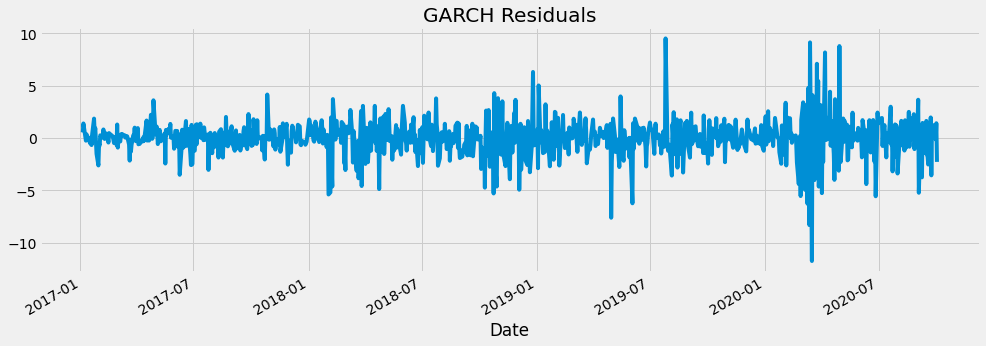

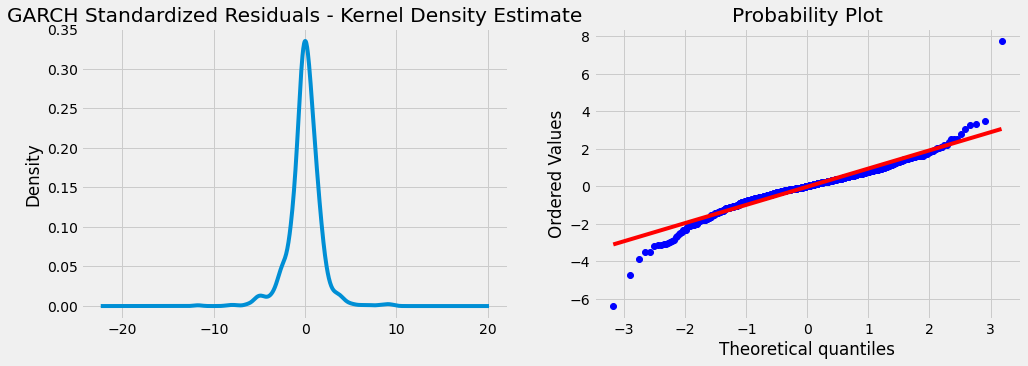

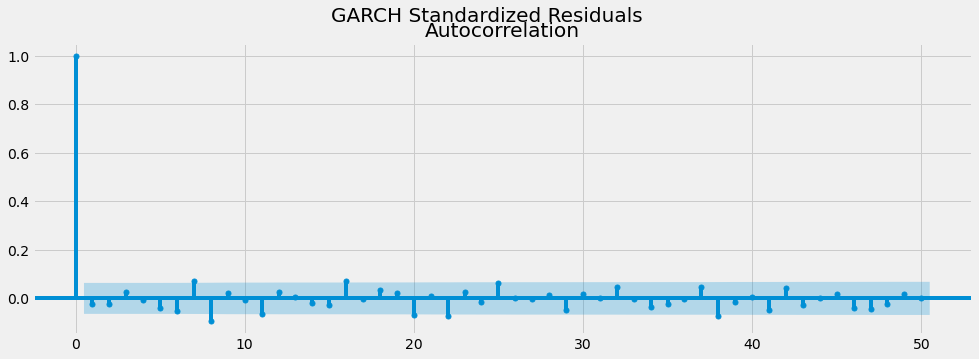

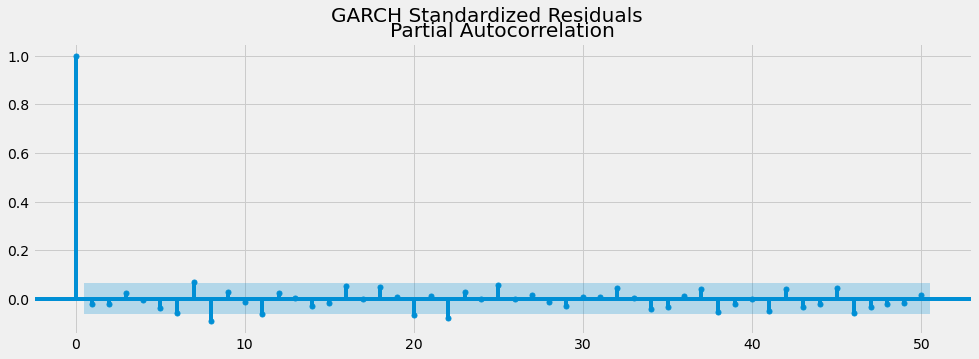

In [295]:
garch_11 = arch_model(close['close_pct_change'], vol='GARCH', p=1, q=1, dist='normal',rescale=False)
garch_fit = garch_11.fit(disp='off') 
residuals = garch_fit.resid

residuals.plot(title='GARCH Residuals')

standardized_residuals = np.divide(residuals, garch_fit.conditional_volatility)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_title('GARCH Standardized Residuals - Kernel Density Estimate')
ax[1].set_title('GARCH Standardized Resduals - Probability Plot')    
residuals.plot(kind='kde', ax=ax[0])
probplot(standardized_residuals, dist='norm', plot=ax[1])
plt.show()

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
acf = plot_acf(standardized_residuals, lags=50,ax=ax[0])
pacf = plot_pacf(standardized_residuals, lags=50,ax=ax[1])
acf.suptitle('GARCH Standardized Residuals', fontsize=20)
plt.show()


In [296]:
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:       close_pct_change   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1746.53
Distribution:                  Normal   AIC:                           3501.07
Method:            Maximum Likelihood   BIC:                           3520.46
                                        No. Observations:                  943
Date:                Fri, Oct 16 2020   Df Residuals:                      939
Time:                        11:12:24   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1099  5.070e-02      2.168  3.019e-02 [1.053e-0

**Interpret the results from GARCH(1,1) model**

**Omega** is the baseline variance for the model. Its standard error = 7.604e-02 which indicates that we can expect the series returns to the mean (here we have mean = 0) with 7.6% standard deviation. 

**Alpha** is often interpreted as short run persistence while **Beta** is interpreted as long run persistence.

- **Alpha** measures the extent to which a short volatility shock today feeds through into the volatility of the next period. In our model, 3% of previous volatility is passed to the volatility of the next day. 

- **Beta** measures how fast large volatilities decay after a shock. Here we have beta < 1 which indicate that the volatilities is not that fast to decay after a shock but eventually it decays. 

- The sum of alpha1 and beta1 should be less than 1.  If the sum is greater than 1, then the predictions of volatility are explosive.  If the sum is equal to 1, then we have an exponential decay model. Here in our model case, the sum is equal to 0.9715 which is quite close to 1.

**Model how well the GARCH(1,1) fit our data**

***The fitting conditions:***

**1. The standardized residuals from the GARCH model should approach normal distribution.**

- **Shapiro-Wilk test**: if standardized residuals follow normal distribution.
    - $H_0$ : data follows normal distribution
    - $H_1$ : data does not follow normal distribution
- **Jarque-Bera test (for large dataset)** is a lagrange multiplier test for normality. It is normally used to test large datasets when other normality tests are not reliable. (Here the dataset is not that large so I am not going to use this test)
    - $H_0$ : The data is normally distributed
    - $H_1$ : The data does not come from a normal distribution

- **Q-Q plot** to check if residuals follow normal distribution.
- **Histogram** of the residuals

**2. The standardized residuals from the GARCH model should not be autocorrelated.**

- **Ljung-Box test**: If autocorrelation exists in the standardized residuals. 

    - $H_0$: No autocorrelation. Data is indepedently distributed.

    - $H_1$: There is autocorrelation. Data is not independently distributed.

**3. There should not have remaining ARCH effects in the residuals.**

- **Engle's ARCH test**: if there is conditional heteroskedasticity ARCH effects in the residuals.
    - $H_0$ : The squared residuals are a sequence of white noise. In other words, the residuals are homoscedastic. Residuals exhibits no ARCH effects.
    - $H_1$ : The squared residuals are not white noise and exhibit heteroskedasticity. ARCH(lag) effects are present.



In [301]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_arch

In [308]:
engle_test_results = het_arch(residuals, nlags=50)
shapiro_test_result = shapiro(standardized_residuals)
ljungbox_test_result = acorr_ljungbox(standardized_residuals, lags= 50, boxpierce=True)
print(f'Engle p-value: {engle_test_results[1]}')
print(f'Shapiro-Wilks p-value: {shapiro_test_result[1]}')
print(f'Ljungbox p-value: {ljungbox_test_result[1]}')
print(f'Boxpierce p-value: {ljungbox_test_result[3]}')


Engle p-value: 2.871570153355253e-19
Shapiro-Wilks p-value: 1.2881784491925455e-19
Ljungbox p-value: [0.47591127 0.60150928 0.64623856 0.7902007  0.65304625 0.41389979
 0.13880588 0.01325532 0.01899796 0.03067665 0.01405641 0.01862891
 0.02851924 0.03830461 0.04467147 0.01747216 0.02548012 0.0271865
 0.03336879 0.01333332 0.01868827 0.00639487 0.00753012 0.01014912
 0.00532023 0.00758772 0.01061629 0.01393626 0.01071089 0.01365057
 0.01835563 0.01503343 0.01995409 0.02030879 0.02378701 0.03068844
 0.02537304 0.01059502 0.01323435 0.01714238 0.01416372 0.01222591
 0.01361728 0.01752649 0.02103387 0.01954395 0.01741636 0.02011214
 0.02354998 0.02935925]
Boxpierce p-value: [0.47661238 0.60264281 0.64784514 0.79155268 0.65600359 0.41864803
 0.14276753 0.01413421 0.02023208 0.03254546 0.01519378 0.02012256
 0.03067612 0.04111984 0.0480038  0.01934888 0.02807805 0.03006938
 0.03687818 0.01528246 0.02130765 0.00763094 0.00899599 0.01207113
 0.00654658 0.00926921 0.01287602 0.01681873 0.013194

**Interpret results from statistical models**

- **Engle p-value < 0.05**: Reject null hypothesis. The residuals still have remaining ARCH effect.

- **Shapiro-Wilks p-value < 0.05**: Reject null hypothesis. The residuals does not follow normal distribution.

- **Ljungbox p-value and Boxpierce p-value**: p-values of lags between 1 and 7  are larger than 0.05 but p-value for other lags < 0.05. Thus we reject null hypothesis. There are autocorrelation among residuals.

***=> the GARCH(1,1) does not capture very well the conditional heteroscedasticity in the variance.***

**Grid search for GARCH's optimal parameters**

In [321]:
def GARCH_parameters_grid_search(data, range_p, range_q):
    optimal_score  = float('inf')
    optimal_results = None
    optimal_models = []
    for p in range_p:
        for q in range_q:
            try:
                model = arch_model(data, vol='GARCH', p=p, q=q, dist='normal')
                model_fit = model.fit(disp='off')
                residuals = model_fit.resid
                standardized_residuals = np.divide(residuals, model_fit.conditional_volatility)
                results = output_model_results(residuals, standardized_residuals)
                results['AIC'] = model_fit.aic
                results['params_p'] = p
                results['params_q'] = q
                if results['AIC'] < optimal_score: 
                    optimal_score = results['AIC']
                    optimal_results = results
                elif results['engle_pvalue'] > 0.05:
                    optimal_models.append(results)
            except:
                continue
    optimal_models.append(optimal_results)
    return optimal_models
                
def output_model_results(residuals, standardized_residuals, lags=50):
    results = {
        'engle_pvalue': None,
        'shapiro_pvalue': None,
        'ljungbox_pvalue': None,
        'AIC': None,
        'param_p': None,
        'param_q' : None
    }
    engle_test_results = het_arch(residuals, nlags=lags)
    shapiro_test_result = shapiro(standardized_residuals)
    ljungbox_test_result = acorr_ljungbox(standardized_residuals, lags= 50, boxpierce=False)
    results['engle_pvalue'] = engle_test_results[1]
    results['shapiro_pvalue'] = shapiro_test_result[1]
    results['ljungbox_pvalue'] = ljungbox_test_result[1]
    return results


In [324]:
range_p = range(0,10)
range_q = range(0,10)
close['dif_close_pct_change']= close['close_pct_change'].diff()

close.dropna(inplace=True)

top_models =  GARCH_parameters_grid_search(close['dif_close_pct_change'], p_rng, q_rng)
print(top_models)

[{'LM_pvalue': [2.648721395690843e-68, True], 'F_pvalue': [9.255591428268671e-102, True], 'SW_pvalue': [1.9811863467052854e-13, True], 'AIC': 4048.9570001530624, 'params': {'p': 1, 'q': 3}}]


**Use the parameters outputted from gridsearch**

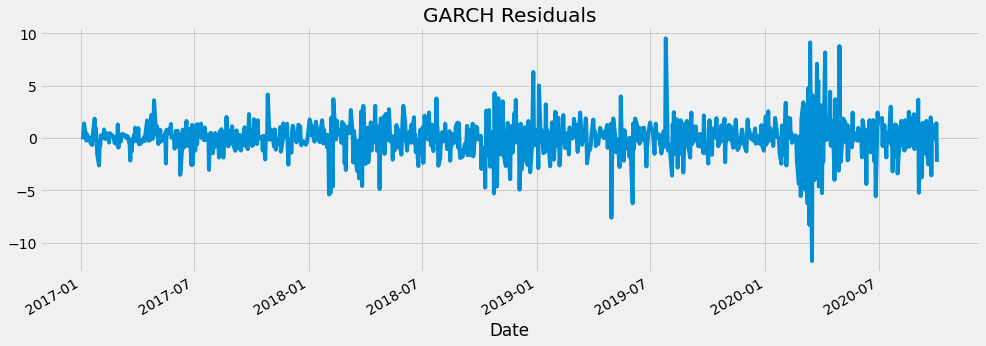

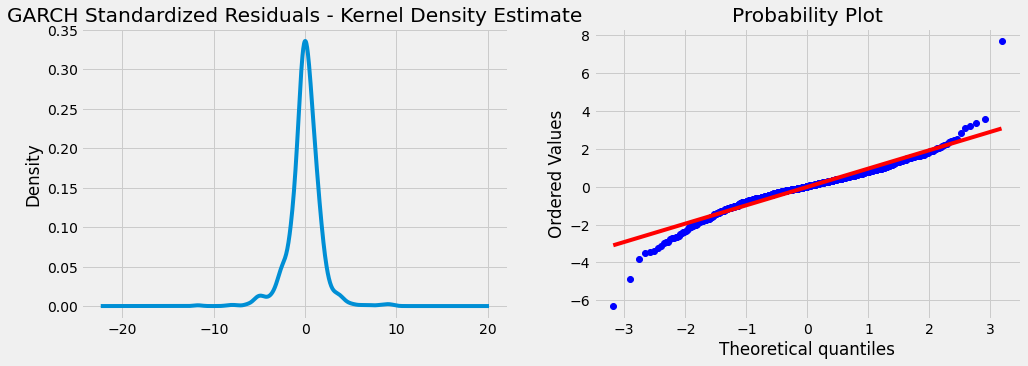

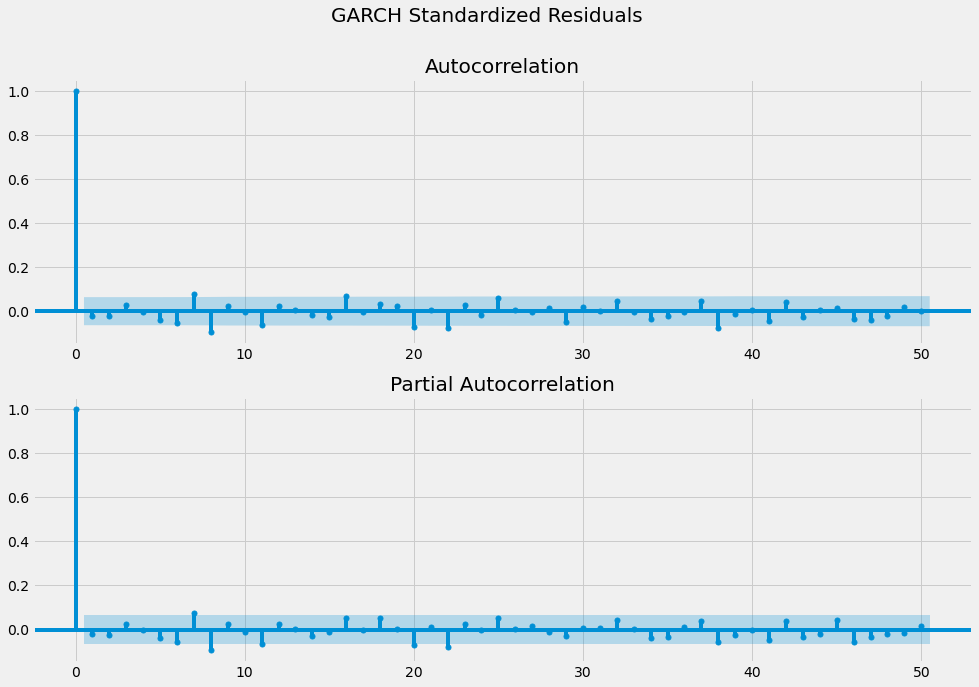

In [37]:
garch_13 = arch_model(close['close_pct_change'], vol='GARCH', p=1, q=3, dist='normal',rescale=False)
garch_13_fit = garch_13.fit(disp='off') 
residuals = garch_13_fit.resid

residuals.plot(title='GARCH Residuals',figsize=(15,5))

standardized_residuals = np.divide(residuals, garch_13_fit.conditional_volatility)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].set_title('GARCH Standardized Residuals - Kernel Density Estimate')
ax[1].set_title('GARCH Standardized Resduals - Probability Plot')    
residuals.plot(kind='kde', ax=ax[0])
probplot(standardized_residuals, dist='norm', plot=ax[1])
plt.show()

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
acf = plot_acf(standardized_residuals, lags=50,ax=ax[0])
pacf = plot_pacf(standardized_residuals, lags=50,ax=ax[1])
acf.suptitle('GARCH Standardized Residuals', fontsize=20)
plt.show()

In [38]:
print(garch_13_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:       close_pct_change   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1745.46
Distribution:                  Normal   AIC:                           3502.93
Method:            Maximum Likelihood   BIC:                           3532.03
                                        No. Observations:                  944
Date:                Sun, Nov 15 2020   Df Residuals:                      938
Time:                        18:44:58   Df Model:                            6
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1111  5.136e-02      2.164  3.048e-02 [1.047e-0

The performance is not better than the previous GARCH(1,1).

## Neural Network Models

In [61]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

**Train, val, test split**

In [87]:
n = close.shape[0]
train_df = close[0:int(n*0.7)]
val_df = close[int(n*0.7):int(n*0.9)]
test_df = close[int(n*0.9):]

**Normalize data**

In [88]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

**Prepare window function and dataset for model**

The dataset will be prepared as a window of consecutive samples from the data.

**Step 1** Create window with indexes of input and label data

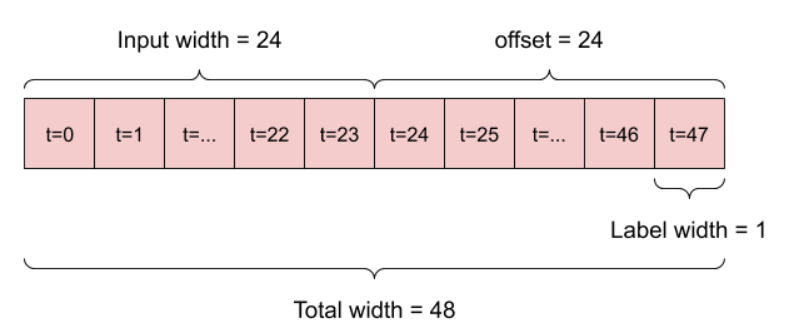

In [328]:
Image.open('images/window.PNG')

In [89]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

**Step 2** Split window to 2 windows: input window with input indexes, output window with output indexes

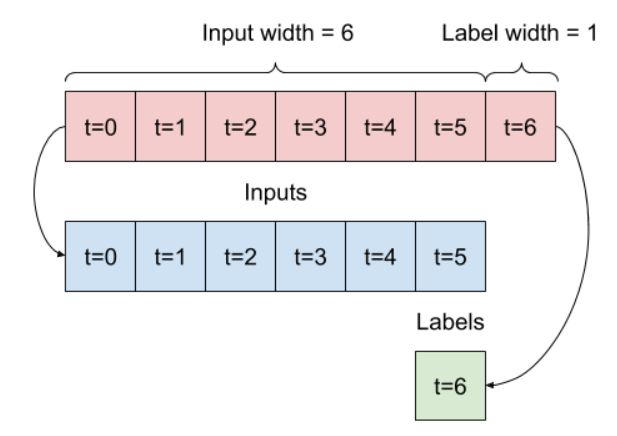

In [329]:
Image.open('images/split.PNG')

In [90]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

**Step 3** create dataset with the windows of indexes 

In [91]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [92]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)



WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test

**Compile and fit function**

In [95]:
MAX_EPOCHS = 30

def compile_and_fit(model, window, patience=30):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                        shuffle=True,
                      callbacks=[early_stopping])
    return history


In [96]:
# dictionaries to hold models' performance
val_performance = {}
performance = {}

### Single step models

In this section, I will implement models that use 15 lagged values to predict only the current value.

In [93]:
single_step_window = WindowGenerator(
    input_width=15, label_width=1, shift=1,
    label_columns=['Close'])
single_step_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15]
Label column name(s): ['Close']

Here we have the indices of input and label

In [330]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (128, 15, 1)
Labels shape (batch, time, features): (128, 1, 1)


Here we use only 1 feature: Google Close price.

#### Feedforward linear model

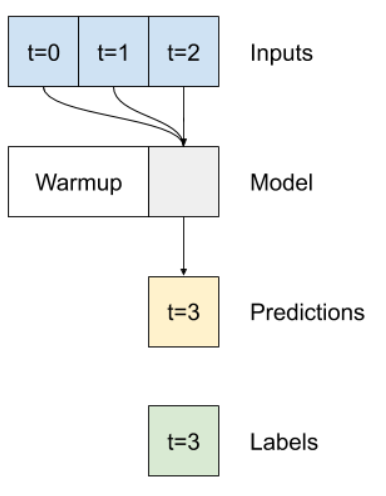

In [332]:
Image.open('images/linear.PNG')

**Model**

In [97]:
input_layer = Input(shape=(15), dtype='float32')
dense1 = Dense(60, activation='linear')(input_layer)
dense2 = Dense(60, activation='linear')(dense1)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)
linear = Model(inputs=input_layer, outputs=output_layer)

**Fit and train**

In [99]:
history = compile_and_fit(linear, single_step_window)

val_performance['linear'] = linear.evaluate(single_step_window.val)
performance['linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/30
6/6 [==============================] - 0s 48ms/step - loss: 0.3864 - mean_absolute_error: 0.4489 - val_loss: 0.3652 - val_mean_absolute_error: 0.4743
Epoch 2/30
6/6 [==============================] - 0s 21ms/step - loss: 0.3006 - mean_absolute_error: 0.4003 - val_loss: 0.4632 - val_mean_absolute_error: 0.6190
Epoch 3/30
6/6 [==============================] - 0s 20ms/step - loss: 0.1686 - mean_absolute_error: 0.3068 - val_loss: 0.3150 - val_mean_absolute_error: 0.4339
Epoch 4/30
6/6 [==============================] - 0s 20ms/step - loss: 0.2074 - mean_absolute_error: 0.3336 - val_loss: 0.1615 - val_mean_absolute_error: 0.3470
Epoch 5/30
6/6 [==============================] - 0s 20ms/step - loss: 0.1464 - mean_absolute_error: 0.2810 - val_loss: 0.0999 - val_mean_absolute_error: 0.2234
Epoch 6/30
6/6 [==============================] - 0s 20ms/step - loss: 0.1446 - mean_absolute_error: 0.2883 - val_loss: 0.2262 - val_mean_absolute_error: 0.3512
Epoch 7/30
6/6 [==================

**Evaluate on test data**

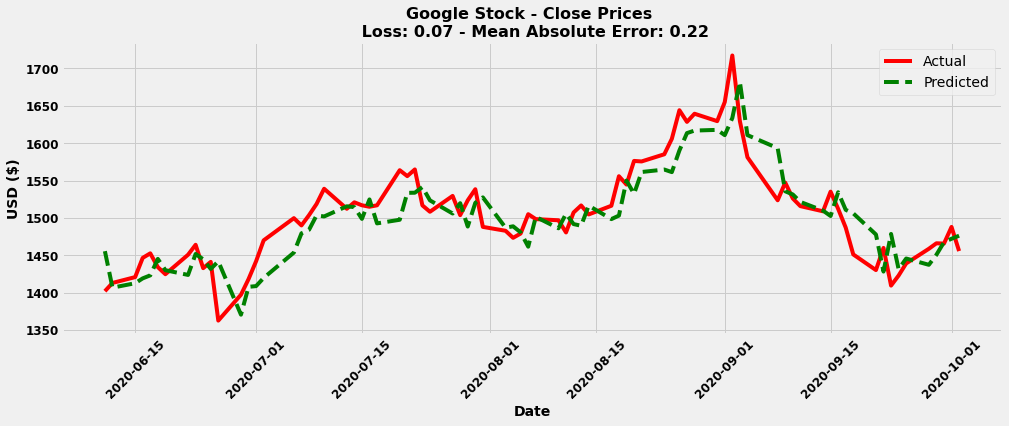

In [103]:
# get prediction on test data

for (x,y) in single_step_window.test:
    predicted = linear.predict(x)
    
# transform prediction to dataframe so that each predicted value has coresponding datetime   
y_pred = pd.DataFrame(predicted.reshape(-1), columns=['Close'])
y_pred.index = test_df.index[15:]

# convert prediction and label of test data back to its orginal scale
y_pred = y_pred * train_std + train_mean
y_test = test_df * train_std + train_mean

#plot prediction and true label
plt.figure(figsize=(15, 5))
plt.plot(y_test[15:], linestyle='solid', color='r')
plt.plot(y_pred, linestyle='dashed', color='g')

plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
plt.title('Google Stock - Close Prices \n Loss: {:.2f} - Mean Absolute Error: {:.2f}'.format(performance['linear'][0],performance['linear'][1]), weight='bold', fontsize=16)
plt.ylabel('USD ($)', weight='bold', fontsize=14)
plt.xlabel('Date', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

#### Convolutional Neural Network

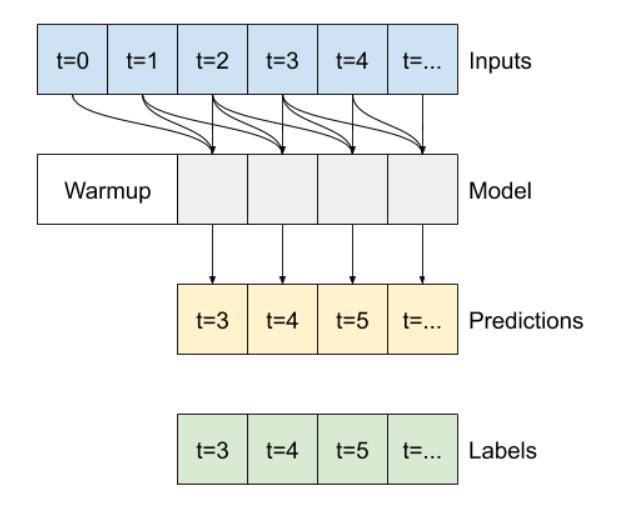

In [333]:
Image.open('images/cnn.PNG')

**Model**

In [104]:
CONV_WIDTH = 15
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Close'])

conv_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15]
Label column name(s): ['Close']

In [108]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

**Fit and train**

In [109]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

2/2 [==============================] - 0s 2ms/step - loss: 0.0852 - mean_absolute_error: 0.2223


**Evaluate on test data**

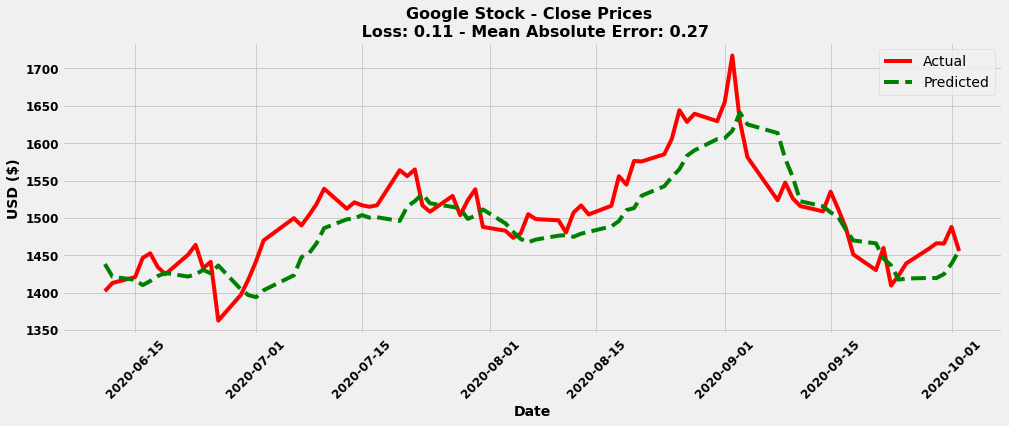

In [112]:
# get prediction on test data

for (x,y) in single_step_window.test:
    predicted = conv_model.predict(x)
    
# transform prediction to dataframe so that each predicted value has coresponding datetime   
y_pred = pd.DataFrame(predicted.reshape(-1), columns=['Close'])
y_pred.index = test_df.index[15:]

# convert prediction and label of test data back to its orginal scale
y_pred = y_pred * train_std + train_mean
y_test = test_df * train_std + train_mean

#plot prediction and true label
plt.figure(figsize=(15, 5))
plt.plot(y_test[15:], linestyle='solid', color='r')
plt.plot(y_pred, linestyle='dashed', color='g')

plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
plt.title('Google Stock - Close Prices \n Loss: {:.2f} - Mean Absolute Error: {:.2f}'.format(performance['Conv'][0],performance['Conv'][1]), weight='bold', fontsize=16)
plt.ylabel('USD ($)', weight='bold', fontsize=14)
plt.xlabel('Date', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

#### Recurrent neural network

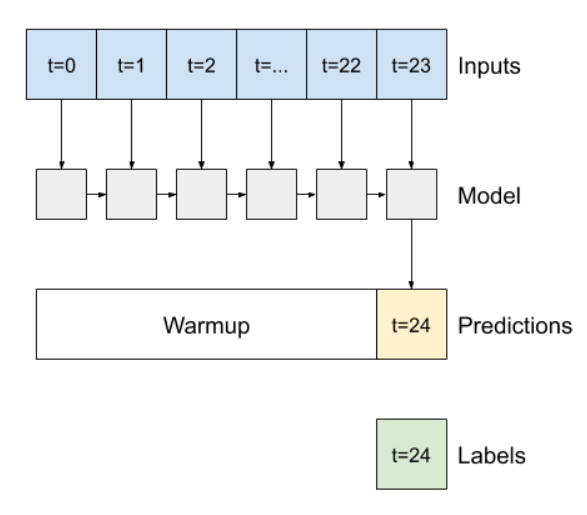

In [334]:
Image.open('images/rnn.PNG')

**Model**

In [113]:
wide_window = WindowGenerator(
    input_width=15, label_width=1, shift=1,
    label_columns=['Close'])


In [114]:
wide_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15]
Label column name(s): ['Close']

In [119]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(500, return_sequences=True),
    Dropout(0.2),
    tf.keras.layers.LSTM(500, return_sequences=False),
    Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

**Fit and train**

In [120]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 68ms/step - loss: 0.1454 - mean_absolute_error: 0.3156


**Evaluate on test data**

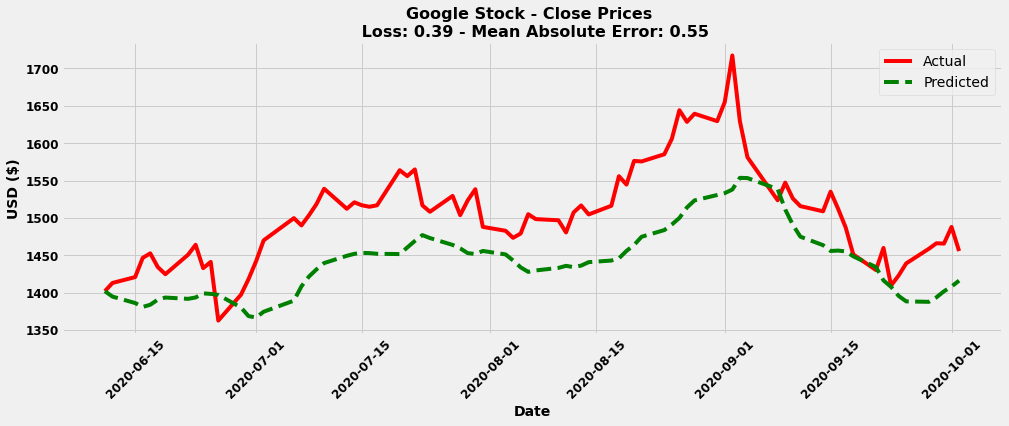

In [123]:
# get prediction on test data

for (x,y) in single_step_window.test:
    predicted = lstm_model.predict(x)
    
# transform prediction to dataframe so that each predicted value has coresponding datetime   
y_pred = pd.DataFrame(predicted.reshape(-1), columns=['Close'])
y_pred.index = test_df.index[15:]

# convert prediction and label of test data back to its orginal scale
y_pred = y_pred * train_std + train_mean
y_test = test_df * train_std + train_mean

#plot prediction and true label
plt.figure(figsize=(15, 5))
plt.plot(y_test[15:], linestyle='solid', color='r')
plt.plot(y_pred, linestyle='dashed', color='g')

plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
plt.title('Google Stock - Close Prices \n Loss: {:.2f} - Mean Absolute Error: {:.2f}'.format(performance['LSTM'][0],performance['LSTM'][1]), weight='bold', fontsize=16)
plt.ylabel('USD ($)', weight='bold', fontsize=14)
plt.xlabel('Date', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

### Multi-step models

Here I will build models which uses 15 lagged values to predict many consecutive values in the future

#### Single-shot model

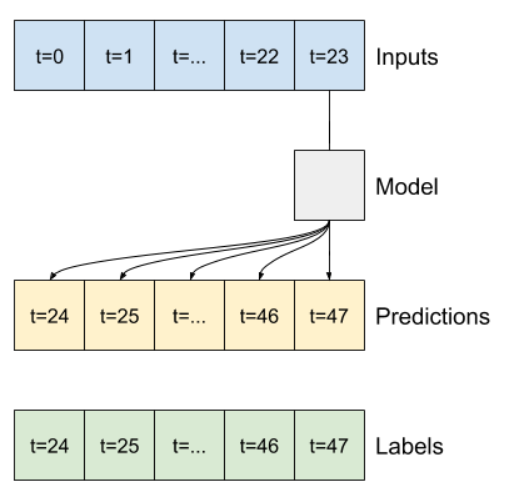

In [126]:
Image.open('images/multi_step_single_shot.PNG')

**Model**

In [127]:
OUT_STEPS = 15
multi_window = WindowGenerator(input_width=15,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window

Total window size: 30
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Label column name(s): None

In [128]:
num_features = close.shape[1]
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])


**Fit and train**

In [335]:

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
val_performance['Linear_multi'] = multi_linear_model.evaluate(multi_window.val)
performance['Linear_multi'] = multi_linear_model.evaluate(multi_window.test, verbose=0)


2/2 [==============================] - 0s 2ms/step - loss: 3.2194 - mean_absolute_error: 1.6331


**Evaluate on test data**

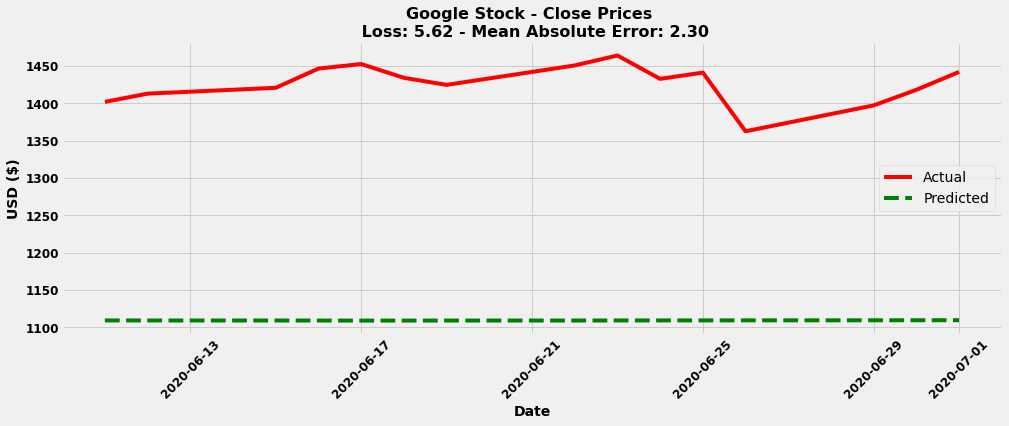

In [199]:
# get prediction on test data

for (history,label) in multi_window.test:
    prediction = multi_linear_model.predict(history)
    
# transform prediction to dataframe so that each predicted value has coresponding datetime   
y_pred = pd.DataFrame(prediction[0].reshape(-1), columns=['Close'])
y_pred.index = test_df.index[15:30]

# convert prediction and label of test data back to its orginal scale
y_pred = y_pred * train_std + train_mean
y_test = test_df * train_std + train_mean

#plot prediction and true label
plt.figure(figsize=(15, 5))
plt.plot(y_test[15:30], linestyle='solid', color='r')
plt.plot(y_pred, linestyle='dashed', color='g')

plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
plt.title('Google Stock - Close Prices \n Loss: {:.2f} - Mean Absolute Error: {:.2f}'.format(performance['Linear_multi'][0],performance[Linear_multi'][1]), weight='bold', fontsize=16)
plt.ylabel('USD ($)', weight='bold', fontsize=14)
plt.xlabel('Date', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()


#### Autoregressive model with RNN

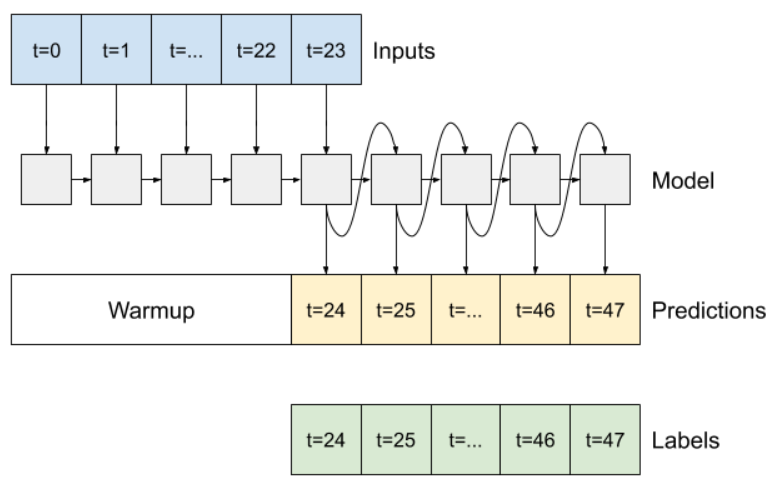

In [451]:
Image.open('images/multi_step_rnn.PNG')

**Model**

In [209]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

In [210]:
feedback_model = FeedBack(units=30, out_steps=OUT_STEPS)


In [211]:
def warmup(self, inputs):
    # inputs.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)

    # predictions.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state

FeedBack.warmup = warmup

In [212]:
def call(self, inputs, training=None):
    # Use a TensorArray to capture dynamically unrolled outputs.
    predictions = []
    # Initialize the lstm state
    prediction, state = self.warmup(inputs)

    # Insert the first prediction
    predictions.append(prediction)

    # Run the rest of the prediction steps
    for n in range(1, self.out_steps):
        # Use the last prediction as input.
        x = prediction
        # Execute one lstm step.
        x, state = self.lstm_cell(x, states=state,
                                  training=training)
        # Convert the lstm output to a prediction.
        prediction = self.dense(x)
        # Add the prediction to the output
        predictions.append(prediction)

    # predictions.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predictions.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

FeedBack.call = call

**Fit and train**

In [336]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

val_performance['AR_LSTM_multi'] = feedback_model.evaluate(multi_window.val)
performance['AR_LSTM_multi'] = feedback_model.evaluate(multi_window.test, verbose=0)
#multi_window.plot(feedback_model)

2/2 [==============================] - 0s 4ms/step - loss: 1.4210 - mean_absolute_error: 1.0155


**Evaluate on test data**

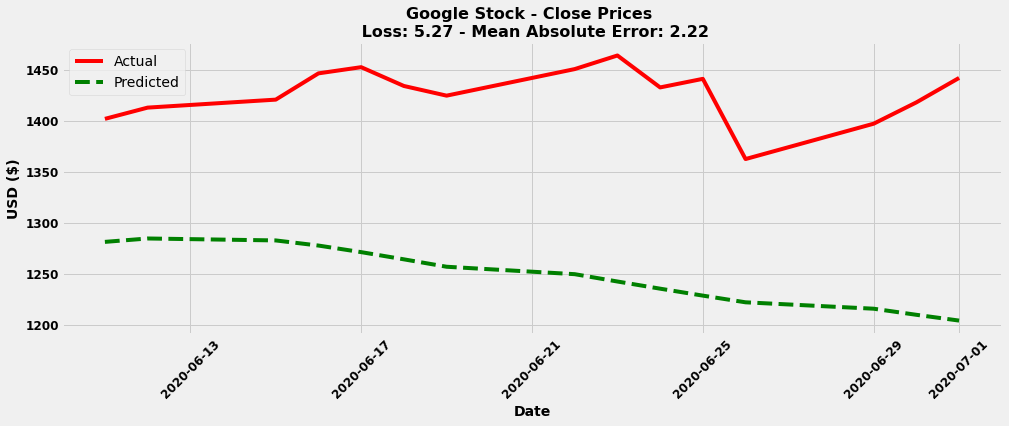

In [208]:
# get prediction on test data

for (x,y) in multi_window.test:
    p = feedback_model.predict(x)
    
# transform prediction to dataframe so that each predicted value has coresponding datetime   
y_pred = pd.DataFrame(p[0].reshape(-1), columns=['Close'])
y_pred.index = test_df.index[15:30]

# convert prediction and label of test data back to its orginal scale
y_pred = y_pred * train_std + train_mean
y_test = test_df * train_std + train_mean

#plot prediction and true label
plt.figure(figsize=(15, 5))
plt.plot(y_test[15:30], linestyle='solid', color='r')
plt.plot(y_pred, linestyle='dashed', color='g')

plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
plt.title('Google Stock - Close Prices \n Loss: {:.2f} - Mean Absolute Error: {:.2f}'.format(performance['AR_LSTM_multi'][0],performance['AR_LSTM_multi'][1]), weight='bold', fontsize=16)
plt.ylabel('USD ($)', weight='bold', fontsize=14)
plt.xlabel('Date', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()


### Model performance comparison

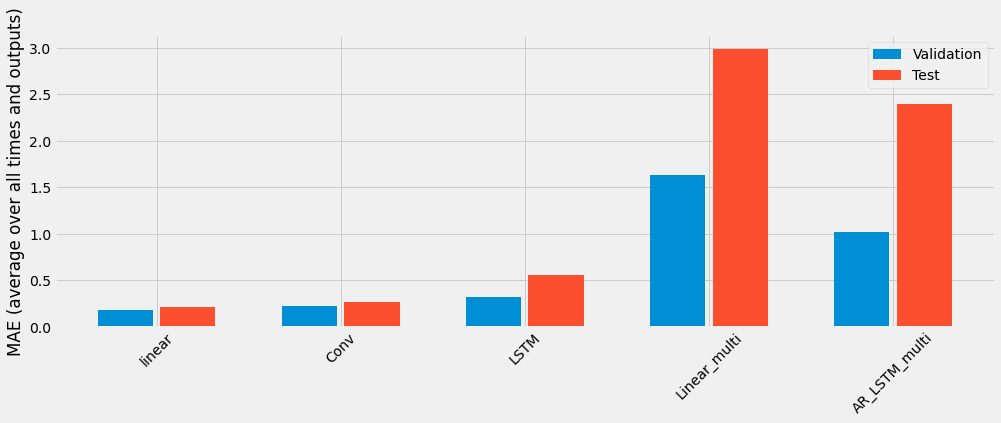

In [343]:
x = np.arange(len(performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

Single-step models outperform multi-step models. Linear model supprisingly outperforms Convolutionary and LSTM since LSTM is supposed to be able to learn dependecies better. LSTM with a better architecture might outperform linear model.